<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/usemostrecent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

<ipython-input-2-d19ce2d20660>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


In [3]:
X = df['text']
y = df['label']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 18.4 MB/s eta 0:00:00


In [6]:
pip install scikeras

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout

In [8]:
embedding = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=0,
    min_delta=0.001,
    mode='max'
)


model = tf.keras.Sequential()
model.add(hub_layer)
model.add(Dense(20,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 20)                10260     
                                                                 
 dense_5 (Dense)             (None, 6)                 126       
                                                                 
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 256808243 (979.65 MB)
Trainable params: 256808243 (979.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])



In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), shuffle =  True, epochs=10, batch_size=64, callbacks = [early_stopping])

Epoch 1/10
25/25 [==============================] - 110s 3s/step - loss: 0.6747 - accuracy: 0.5013 - val_loss: 0.6489 - val_accuracy: 0.4975
Epoch 2/10
25/25 [==============================] - 27s 1s/step - loss: 0.5930 - accuracy: 0.5119 - val_loss: 0.5629 - val_accuracy: 0.5975
Epoch 3/10
25/25 [==============================] - 15s 591ms/step - loss: 0.4629 - accuracy: 0.8406 - val_loss: 0.4953 - val_accuracy: 0.8450
Epoch 4/10
25/25 [==============================] - 12s 474ms/step - loss: 0.3682 - accuracy: 0.9663 - val_loss: 0.4886 - val_accuracy: 0.8675
Epoch 5/10
25/25 [==============================] - 9s 368ms/step - loss: 0.3340 - accuracy: 0.9875 - val_loss: 0.4598 - val_accuracy: 0.8800
Epoch 6/10
25/25 [==============================] - 6s 252ms/step - loss: 0.3220 - accuracy: 0.9900 - val_loss: 0.4938 - val_accuracy: 0.8700


In [14]:

model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 11ms/step - loss: 0.4938 - accuracy: 0.8700


[0.49379023909568787, 0.8700000047683716]

In [15]:

model.evaluate(x_train, y_train)

50/50 [==============================] - 1s 11ms/step - loss: 0.3165 - accuracy: 0.9912


[0.31646499037742615, 0.9912499785423279]

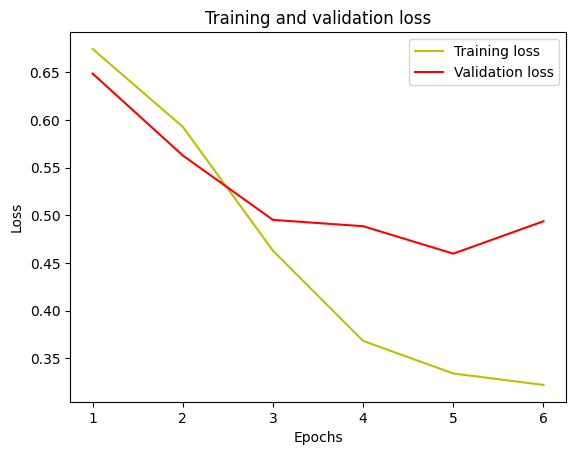

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

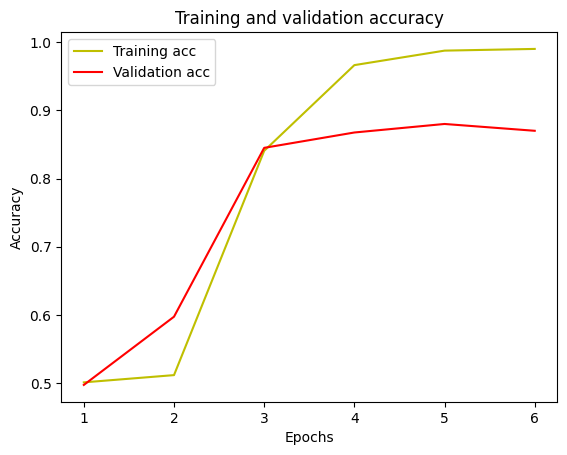

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()